<a href="https://colab.research.google.com/github/MartinaJoergensen/FirstCodes/blob/master/Turorial3_FashionMNIST(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


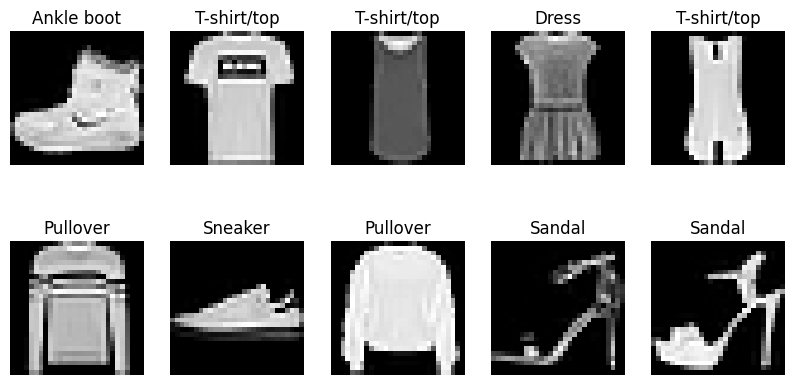

In [ ]:
# 1. Load the Fashion-MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Display a few sample images
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_full[i], cmap="gray")
    plt.title(class_names[y_train_full[i]])
    plt.axis("off")
plt.show()

In [ ]:
# 2. Normalize the data to [0, 1]
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add a channel dimension (since CNN expects 4D input)
x_train_full = np.expand_dims(x_train_full, -1)
x_test = np.expand_dims(x_test, -1)


In [ ]:
# 3. Split into training (50%), validation (25%), test (25%)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.5, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)


print(y_train[0])
# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_val_cat = to_categorical(y_val, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train_cat[0])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# 4. Define a CNN classifier

model = tf.keras.Sequential([
    #####
    tf.keras.layers.Conv2D(32, (3, 3), use_bias=False, input_shape=(28, 28, 1)), #number of kernels and then size of kernels
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'), # flow is Conv → BatchNorm → Activation → Pooling/Dropout

    tf.keras.layers.Conv2D(64, (3,3), use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    #####

    tf.keras.layers.Flatten(),# makes conv features usable by dense layers
    tf.keras.layers.Dense(128, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('sigmoid'),#learns abstract combinations of digit features.
    tf.keras.layers.Dropout(0.5),#regularizes to avoid overfitting.
    tf.keras.layers.Dense(10, activation='softmax')  #  10 classes for digits 0-9, produces the probability distribution over digits 0–9
    ])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 504,746 (1.93 MB)

 Trainable params: 504,042 (1.92 MB)

 Non-trainable params: 704 (2.75 KB)

None


In [ ]:
# 5. Train the model (mini-batch)

history = model.fit(x_train, y_train_cat, epochs=20, validation_data=(x_val, y_val_cat))


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6967 - loss: 0.9600 - val_accuracy: 0.8726 - val_loss: 0.3654
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8485 - loss: 0.4565 - val_accuracy: 0.8874 - val_loss: 0.3145
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8748 - loss: 0.3668 - val_accuracy: 0.8897 - val_loss: 0.2950
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8895 - loss: 0.3192 - val_accuracy: 0.9023 - val_loss: 0.2657
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8979 - loss: 0.2876 - val_accuracy: 0.8995 - val_loss: 0.2650
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9071 - loss: 0.2715 - val_accuracy: 0.9141 - val_loss: 0.2382
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9115 - loss: 0.2443 - val_accuracy: 0.9207 - val_loss: 0.2201
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9184 - loss: 0.2305 - val_accuracy: 

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'\nTest accuracy: {test_acc}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9253 - loss: 0.2021

Test accuracy: 0.9258000254631042


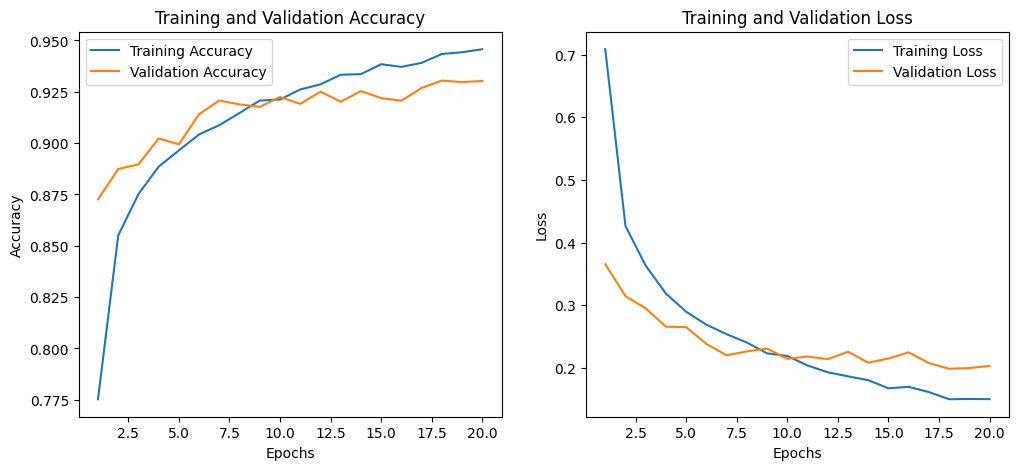

In [ ]:
# 6. Plot learning curves

# Plot training & validation accuracy and loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


# Call the function to plot the training history
plot_training_history(history)


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


/tmp/ipython-input-175295109.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-175295109.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-175295109.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-175295109.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-175295109.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-175295109.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-175295109.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-175295109.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-175295109.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-

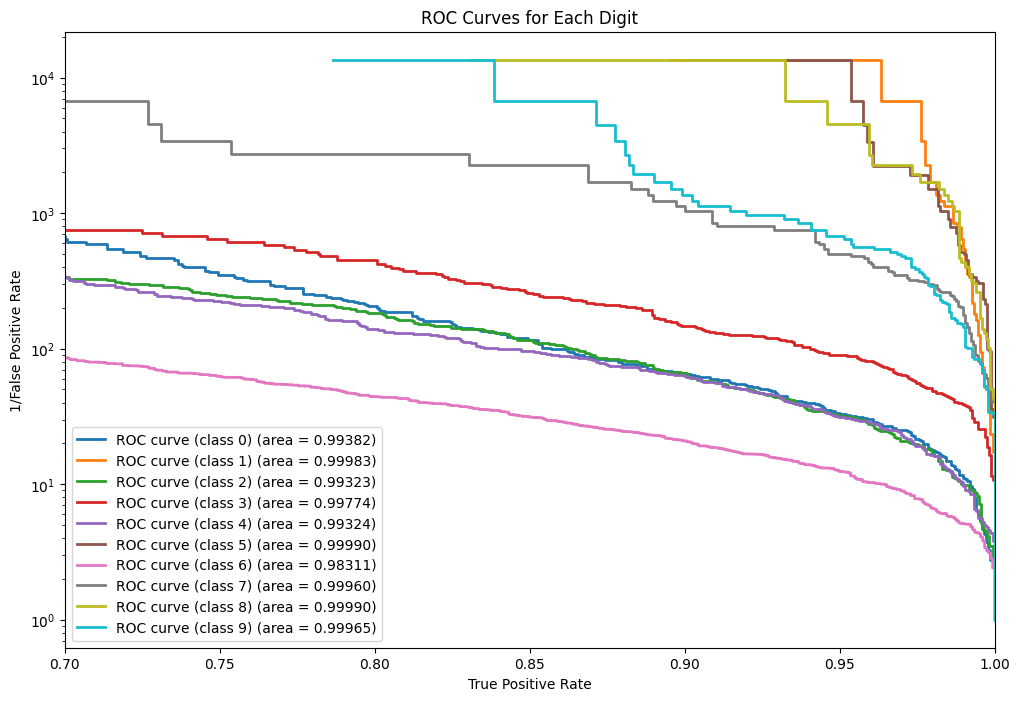

In [ ]:
# 7. ROC Curves (one-vs-all)
def plot_roc_curves(y_true, y_pred):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=np.arange(10))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        fpr[i] = 1/fpr[i]
        fpr[i][np.isnan(fpr[i])] = 0

    # Plot all ROC curves
    plt.figure(figsize=(12, 8))
    colors = plt.cm.get_cmap('tab10')
    for i in range(10):
        plt.plot(tpr[i], fpr[i], color=colors(i), lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.5f})')

    #plt.plot([0, 1], [0, 1], 'k--', lw=2)
    #plt.xscale("log")
    plt.yscale("log")
    plt.xlim([0.7, 1.0])
    #plt.ylim([1., 100000])
    plt.ylabel('1/False Positive Rate')
    plt.xlabel('True Positive Rate')
    plt.title('ROC Curves for Each Digit')
    plt.legend(loc='lower left')
    plt.show()

# Get model predictions
y_pred_prob = model.predict(x_test)
# Plot ROC curves
plot_roc_curves(y_test, y_pred_prob)


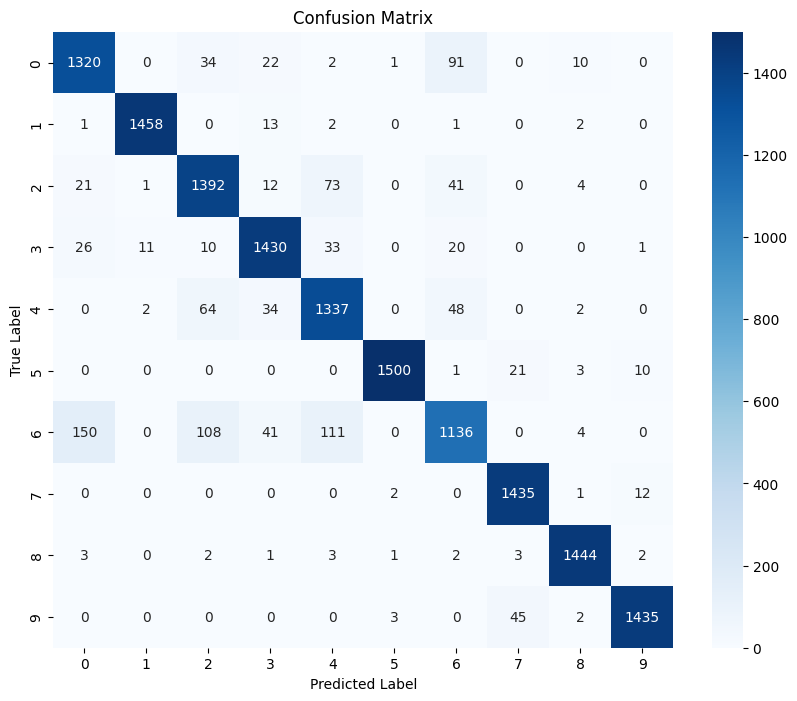

In [ ]:
# 8. Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    y_pred_classes = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_prob)